In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
import json

In [108]:
with open('src/datasets.json','r') as f:
    data = json.load(f)

In [99]:
import pandas as pd

In [100]:
result = []
for dat in data:
    dataset = dat['resource']
    name = dataset['name']
    col_names = dataset['columns_name']
    col_field_names = dataset['columns_field_name']
    col_type = dataset['columns_datatype']
    col_desc = dataset['columns_description']
    
    for i, col_name in enumerate(col_names):
        result.append({'datasaet_name':name, 'col_name': col_name, 'col_field_name': col_field_names[i], 'col_type': col_type[i], 'col_desc': col_desc[i]})
        
result= pd.DataFrame(result)

Text(0.5, 1.0, 'Most common columns')

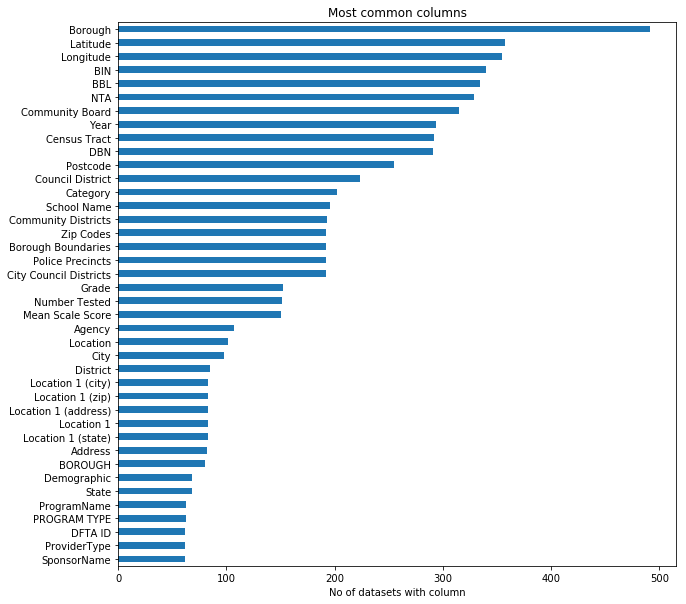

In [144]:
result.col_name.value_counts().sort_values(ascending=True).tail(40).plot(kind='barh',figsize=(10,10))
plt.xlabel('No of datasets with column')
plt.title('Most common columns')

In [141]:
dataset_counts =[]
for dataset in data:
    dataset_counts.append({'dataset': dataset['resource']['name'], 'downloads': dataset['resource']['download_count'], 'page_views': dataset['resource']['page_views']['page_views_total'] })
dataset_counts = pd.DataFrame(dataset_counts)
dataset_counts = dataset_counts.assign(downloads_pc = 100*dataset_counts.downloads.div(dataset_counts.downloads.sum()))
dataset_counts = dataset_counts.assign(page_view_pc = 100*dataset_counts.page_views.div(dataset_counts.page_views.sum()))

dataset_counts = dataset_counts.sort_values(by='downloads_pc', ascending=False).assign(cumulative_pc = lambda x: x.downloads_pc.cumsum())
dataset_counts = dataset_counts.sort_values(by='page_view_pc', ascending=False).assign(cumulative__page_views = lambda x: x.page_view_pc.cumsum())

In [116]:
attributions  = []
for d in data:
    attributions.append(d['resource']['attribution'])

In [121]:
pd.Series(attributions).value_counts()

NYC Department of Education                                                                            299
Department of Education (DOE)                                                                          248
Department of Education                                                                                165
Department of Transportation (DOT)                                                                     123
Department of Parks and Recreation (DPR)                                                               122
                                                                                                      ... 
Department of Youth and Community Development, Runaway and Homeless Youth Services                       1
Mayor's Office of Adult Education (ADULTED)                                                              1
LinkUp                                                                                                   1
Department of Environmental Protectio

In [124]:
dataset_counts.page_views.sum()

16283346

In [129]:
[d for d in data if d['resource']['name'] == '2010 Orthoimagery Manhattan' ]

[{'resource': {'name': '2010 Orthoimagery Manhattan',
   'id': 'dve9-92na',
   'parent_fxf': None,
   'description': 'The Department of Information Technology and Telecommunications, GIS Unit, is providing the raw orthoimagery for download. This orthoimagery is used to create the Aerial Photography Tile Layer services described in further detail here: https://maps.nyc.gov/tiles/. Full metadata on the Aerial & Orthoimagery can be found at: https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_AerialImagery.md \r\nThe 2010 Orthoimagery Tile Index can be used to geo-reference the individual image tiles across the City (https://data.cityofnewyork.us/City-Government/2010-Orthos-Tile-Index/chzg-3b9u)',
   'attribution': 'Department of Information Technology & Telecommunications (DoITT), GIS Unit',
   'attribution_link': 'https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_AerialImagery.md',
   'contact_email': '',
   'type': 'href',
   'u

Text(0.5, 1.0, 'Top 20 datasets by % of downloads')

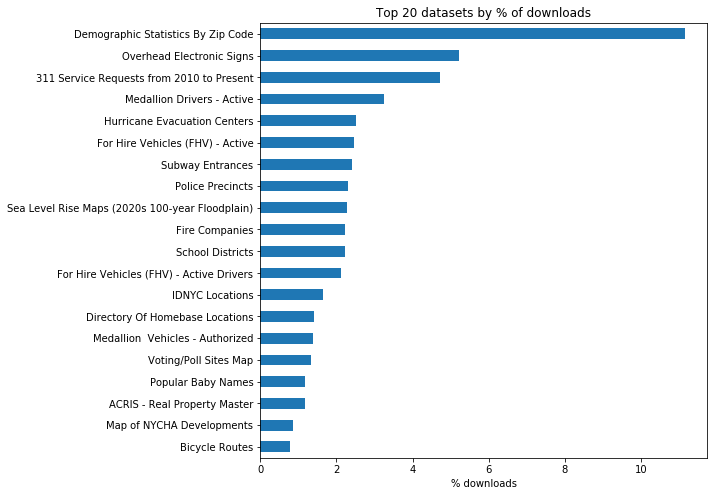

In [140]:
plt.figure(figsize=(8,8))
dataset_counts.set_index('dataset').head(20).iloc[::-1].downloads_pc.plot(kind='barh')
plt.xlabel('% downloads')
plt.ylabel(None)
plt.title('Top 20 datasets by % of downloads')

Text(0.5, 1.0, 'Top 20 datasets by % of page views')

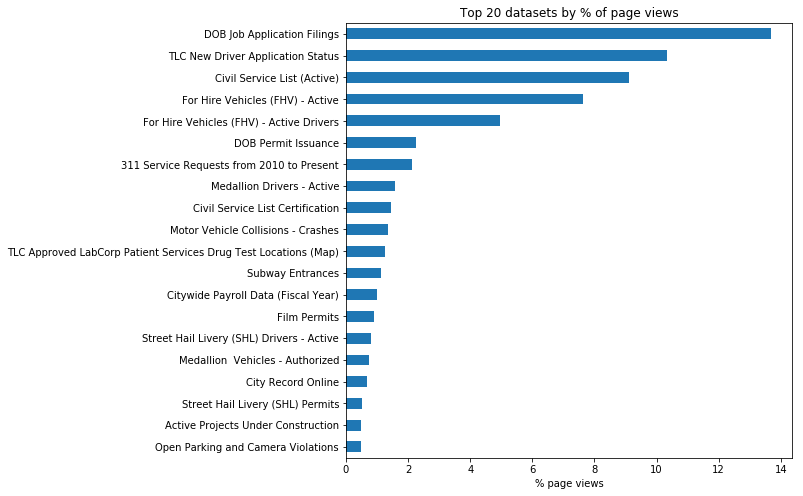

In [139]:
plt.figure(figsize=(8,8))
dataset_counts.set_index('dataset').sort_values(by='page_view_pc',ascending=False).head(20).iloc[::-1].page_view_pc.plot(kind='barh')
plt.xlabel('% page views')
plt.ylabel(None)
plt.title('Top 20 datasets by % of page views')

In [93]:
dataset_counts.sort_values(by='downloads_pc', ascending=False).head(20)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc
2739,Demographic Statistics By Zip Code,917173.0,48689,11.163392,0.299011,11.163392
1539,Overhead Electronic Signs,429285.0,450,5.225052,0.002764,16.388444
2710,311 Service Requests from 2010 to Present,388068.0,345537,4.723378,2.122027,21.111822
2711,Medallion Drivers - Active,266725.0,256540,3.246449,1.575475,24.358272
2414,Hurricane Evacuation Centers,206768.0,4758,2.516681,0.029220,26.874953
2707,For Hire Vehicles (FHV) - Active,201444.0,1245008,2.451880,7.645898,29.326833
2715,Subway Entrances,196858.0,183238,2.396062,1.125309,31.722895
2746,Police Precincts,190073.0,40619,2.313478,0.249451,34.036373
2660,Sea Level Rise Maps (2020s 100-year Floodplain),187506.0,10883,2.282234,0.066835,36.318606
2094,Fire Companies,182690.0,1013,2.223615,0.006221,38.542222


In [142]:
dataset_counts.sort_values(by='page_view_pc', ascending=False).head(20)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
2704,DOB Job Application Filings,28561.0,2229417,0.347631,13.691394,59.863893,13.691394
2705,TLC New Driver Application Status,33566.0,1682110,0.408549,10.330248,56.849981,24.021641
2706,Civil Service List (Active),28805.0,1481398,0.350601,9.097626,59.516262,33.119268
2707,For Hire Vehicles (FHV) - Active,201444.0,1245008,2.451880,7.645898,29.326833,40.765166
2708,For Hire Vehicles (FHV) - Active Drivers,174752.0,805663,2.126998,4.947773,42.890315,45.712939
2709,DOB Permit Issuance,59347.0,365922,0.722343,2.247216,53.355817,47.960155
2710,311 Service Requests from 2010 to Present,388068.0,345537,4.723378,2.122027,21.111822,50.082182
2711,Medallion Drivers - Active,266725.0,256540,3.246449,1.575475,24.358272,51.657657
2712,Civil Service List Certification,9426.0,235783,0.114729,1.448001,68.290725,53.105658
2713,Motor Vehicle Collisions - Crashes,58451.0,221795,0.711438,1.362097,54.067254,54.467755


In [52]:
data[0]['resource']['page_views']['page_views_total']

2214810

In [76]:
dataset_counts.shape

(100, 6)

In [77]:
dataset_counts

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc
32,Demographic Statistics By Zip Code,841845,43501,23.049665,0.372854,23.049665
6,311 Service Requests from 2010 to Present,381640,302508,10.449280,2.592842,33.498945
7,Medallion Drivers - Active,256589,242834,7.025391,2.081367,40.524337
30,School Districts,178982,44309,4.900516,0.379779,45.424853
10,Subway Entrances,174058,174317,4.765698,1.494098,50.190551
...,...,...,...,...,...,...
69,2015 Yellow Taxi Trip Data,19,20166,0.000520,0.172846,99.998494
59,Real-Time Traffic Speed Data,19,23055,0.000520,0.197608,99.999014
50,Open Parking and Camera Violations,18,28836,0.000493,0.247158,99.999507
71,311 Call Center Inquiry,14,19946,0.000383,0.170960,99.999890


In [95]:
dataset_counts.shape

(2804, 6)

In [149]:
dataset_counts[dataset_counts.page_views>0].sort_values(by="page_views").head(200)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
3,BP Appointments - Miscellaneous Boards,153.0,6,0.001862,0.000037,99.339025,100.000000
2,Parks Permit Areas,222.0,8,0.002702,0.000049,98.844764,99.999963
1,CB 106 Active Parking Lot and Garage Licenses,1.0,8,0.000012,0.000049,100.000000,99.999914
103,2012-13 Discharge Reporting Students with Disa...,82.0,9,0.000998,0.000055,99.894132,99.999754
0,2010-11 Discharge Reporting by Code - HS,87.0,9,0.001059,0.000055,99.843657,99.999865
...,...,...,...,...,...,...,...
113,Department for the Aging (DFTA) Reported Line ...,224.0,36,0.002726,0.000221,98.831205,99.970774
110,2013-14 Discharge Reporting By Code - HS,90.0,36,0.001095,0.000221,99.800460,99.970553
108,2014 - 2015 Co-Location Report,90.0,36,0.001095,0.000221,99.807033,99.970332
107,2010-11 Transfer or Discharge Code - Grades 9-12,89.0,36,0.001083,0.000221,99.822259,99.970111
